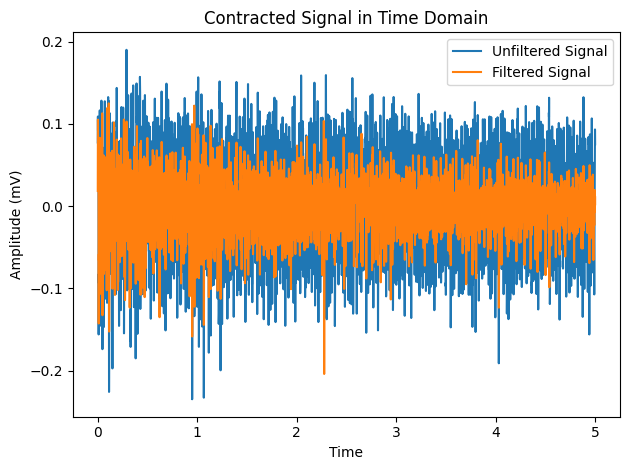

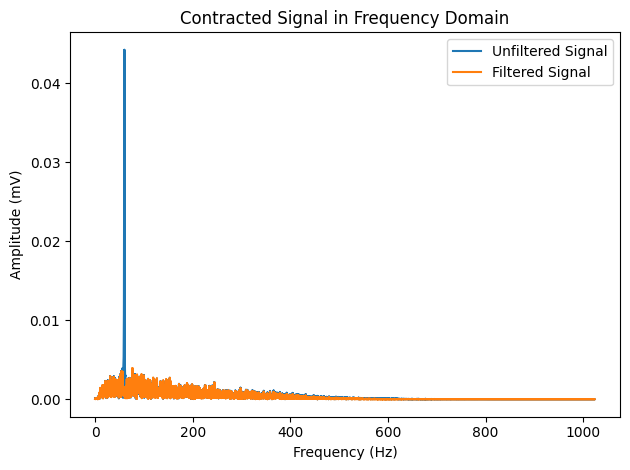

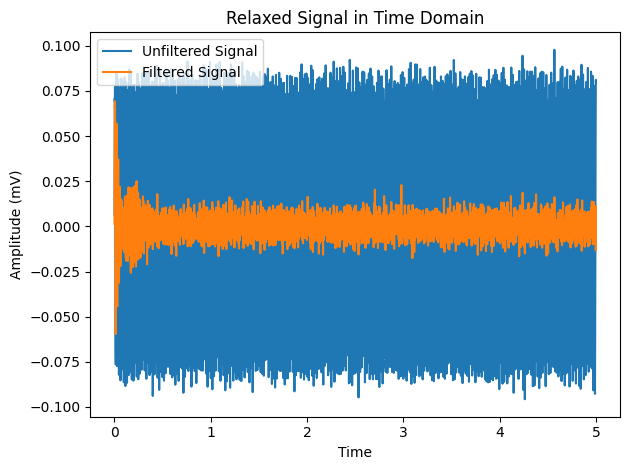

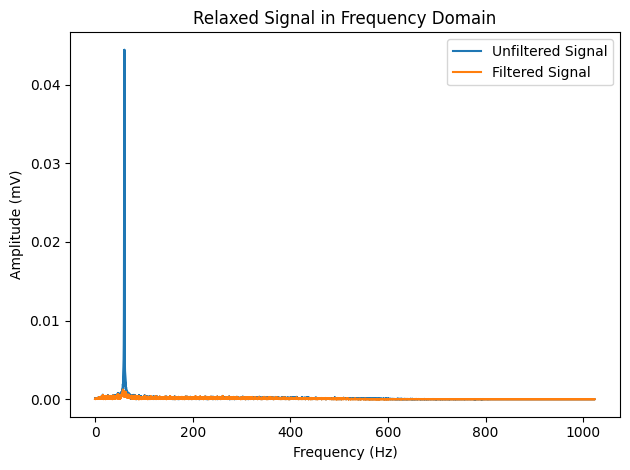

RMS Values for Relaxed EMG without filtering: 0.05680275831355331
RMS Values for Contracted EMG without filtering: 0.06450462217192754
RMS Values for Relaxed EMG with filtering: 0.006655993390326213
RMS Values for Contracted EMG with filtering: 0.0308390856820656
Order 2: 
Unfiltered RMS Difference: 0.007701863858374229
Filtered RMS Difference: 0.024183092291739386


In [79]:
# Imports
import pandas as pd #import pandas for dataframes
import numpy as np #import numpy for mathematical functions

from matplotlib import pyplot as plt #import mpl for plots
from scipy import signal, fftpack #import scipy to use fft 

# Constants
FS = 2048 # Set sampling frequency based on total number of samples divided by 5 seconds
ORDER = 2 # Filter Order For Both Filters
F1 = 58 # Lower Bound for Bandstop Filter
F2 = 62 # Upper Bound for Bandstop Filter
F3 = 0.1 # Lower Bound for Bandpass Filter
F4 = 450 # Upper Bound for Bandpass Filter


# Functions
def filter(data):  # function to create and apply filters to the signal
    sos_bandstop = signal.butter(ORDER, [F1, F2], btype='bandstop', fs=FS, output='sos') # initialize bandstop filter
    bandstop_filtered_data = signal.sosfilt(sos_bandstop, data) # run bandstop filtering
    sos_bandpass = signal.butter(ORDER, [F3, F4], btype='bandpass', fs=FS, output='sos') # initialize bandpass filter
    final_filtered_data = signal.sosfilt(sos_bandpass, bandstop_filtered_data)  #run bandpass filtering


    # #Transfer Function Calculation Code
    # bpnum_coefficients, bpdenom_coefficients = signal.sos2tf(sos_bandpass)   #get bandpass transfer function coefficient values
    # tf_pass = signal.TransferFunction(bpnum_coefficients, bpdenom_coefficients)     # Create the transfer functions 

    # bsnum_coefficients, bsdenom_coefficients = signal.sos2tf(sos_bandstop)   #get bandstop transfer function coefficient values
    # tf_stop = signal.TransferFunction(bsnum_coefficients, bsdenom_coefficients)     # Create the transfer functions 

    # # Display the transfer functions
    # print("Transfer Function Bandpass:")
    # print(tf_pass)
    # print("Transfer Function Bandstop:")
    # print(tf_stop)

    return final_filtered_data


def fft(array):  # run fft
    N = len(array) # get total number of samples
    sig_fft = fftpack.fft(array) # use fftpack to fourier transform the data
    sig_amp = 2 / N * np.abs(sig_fft)  # determine properly scaled amplitude of fft outputs
    sig_freq = np.abs(fftpack.fftfreq(N, 1 / FS)) # use fftpack to determine array of frequencies
    return sig_freq, sig_amp


def plot(x1, y1, title):  # plot and show the data
    plt.rcParams["figure.autolayout"] = True # auto scale plot parameters
    plt.xlabel('Time') # Label X axis
    plt.ylabel('Amplitude (mV)') # Y axis title
    plt.title(f'{title} Signal in Time Domain') # chart title
    plt.plot(x1, y1, label = 'Unfiltered Signal') #Plot time vs output in time domain unfiltered
    plt.plot(x1, filter(y1), label = 'Filtered Signal') #Plot time vs output in time domain filtered on same plot
    plt.legend() # activate legend
    plt.show() #display plot
    plt.xlabel('Frequency (Hz)') # x axis title 
    plt.ylabel('Amplitude (mV)') # Y axis title
    plt.title(f'{title} Signal in Frequency Domain') # chart title
    freq, amp = fft(np.array(y1)) # get frequencies and amplitudes from fft to plot
    plt.plot(freq, amp, label = 'Unfiltered Signal') #plot freq against amplitude in frequency domain unfiltered
    filter_freq, filter_amp = fft(np.array(filter(y1))) #get filtered frequencies and corresponding amplitudes from fft to plot
    plt.plot(filter_freq, filter_amp, label = 'Filtered Signal') # plot freq against amplitude in frequency domain filtered on same plot
    plt.legend() #activate plot legend
    plt.show() # display plot


# read file
columns = ["Time", "EMG_Relaxed", "EMG_Contracted"] #set dataframe column names based on EMG column titles
df = pd.read_csv("EMG_Datasets.csv", usecols=columns) #read csv and store in dataframe

df_final = pd.DataFrame({'Time': df.Time, 'EMG_Relaxed':filter(df.EMG_Relaxed) , 'EMG_Contracted':filter(df.EMG_Contracted)})
df_final.to_csv("Output.csv")

# run
plot(df.Time, df.EMG_Contracted, "Contracted") #call plot function with time vs contracted signal to be plotted
plot(df.Time, df.EMG_Relaxed, "Relaxed") #Call plot function with time vs relaxed signal to be plotted

RMS_Relaxed_Unfiltered = np.sqrt(np.mean(np.array(df.EMG_Relaxed) ** 2)) #Calculate RMS Values
RMS_Contracted_Unfiltered = np.sqrt(np.mean(np.array(df.EMG_Contracted) ** 2)) #Calculate RMS Values
RMS_Relaxed_Filtered = np.sqrt(np.mean(filter(df.EMG_Relaxed) ** 2)) #Calculate RMS Values
RMS_Contracted_Filtered = np.sqrt(np.mean(filter(df.EMG_Contracted) ** 2))#Calculate RMS Values 

# RMS Values
print("RMS Values for Relaxed EMG without filtering:", RMS_Relaxed_Unfiltered) #Display RMS values
print("RMS Values for Contracted EMG without filtering:", RMS_Contracted_Unfiltered) #Display RMS values
print("RMS Values for Relaxed EMG with filtering:", RMS_Relaxed_Filtered) #Display RMS values
print("RMS Values for Contracted EMG with filtering:", RMS_Contracted_Filtered) #Display RMS values

print(f"Order {ORDER}: ")
print("Unfiltered RMS Difference:", (RMS_Contracted_Unfiltered - RMS_Relaxed_Unfiltered)) # Calculate Difference in unfiltered RMS to determine efficacy of filter
print("Filtered RMS Difference:", (RMS_Contracted_Filtered - RMS_Relaxed_Filtered)) # Calculate Difference in filtered RMS to determine efficacy of filter